# 📊 Sales Data Analysis Project

This mini-project demonstrates my ability to work with real-world data using **Python**, **pandas**, and **visualization libraries** like **matplotlib** and **seaborn**.

### 📌 Objective:
- Clean and analyze sales data.
- Identify trends across product lines, countries, and customers.
- Visualize important patterns in monthly sales and top-performing categories.

---


In [ ]:
pip install pandas matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('/users/mohamedaminetriki/downloads/sales_data_sample.csv', encoding='ISO-8859-1')
df=df.drop_duplicates()
print(df.info())

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [2]:
print(df.isnull().sum())

df = df.dropna(subset=["POSTALCODE"])
df["STATE"] = df["STATE"].fillna("Unknown")
print(df)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6

In [3]:
unique_items= df.ORDERNUMBER.nunique()
print(unique_items)

298


In [4]:
order_line= df.PRODUCTLINE.nunique()
print(order_line)

7


In [5]:
country_max= df.COUNTRY.value_counts().idxmax()
print(country_max)

USA


/var/folders/02/y2319mm13dj1d3kls8938j2m0000gn/T/ipykernel_89878/3686602270.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('ORDERDATE').resample('M')['SALES'].sum()


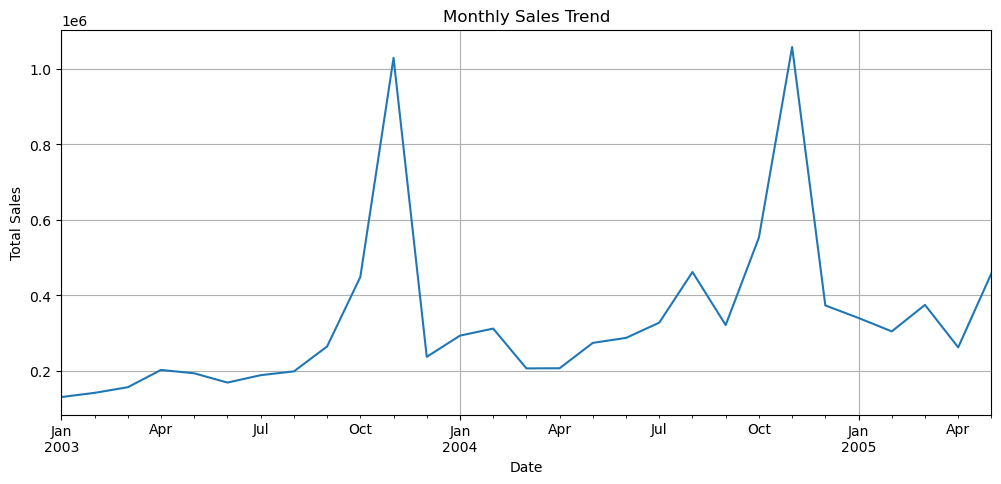

In [6]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
monthly_sales = df.set_index('ORDERDATE').resample('M')['SALES'].sum()

monthly_sales.plot(figsize=(12,5), title='Monthly Sales Trend')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [7]:
top_products = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
print(top_products)


PRODUCTLINE
Classic Cars        3842868.54
Vintage Cars        1806675.68
Trucks and Buses    1111559.19
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Name: SALES, dtype: float64


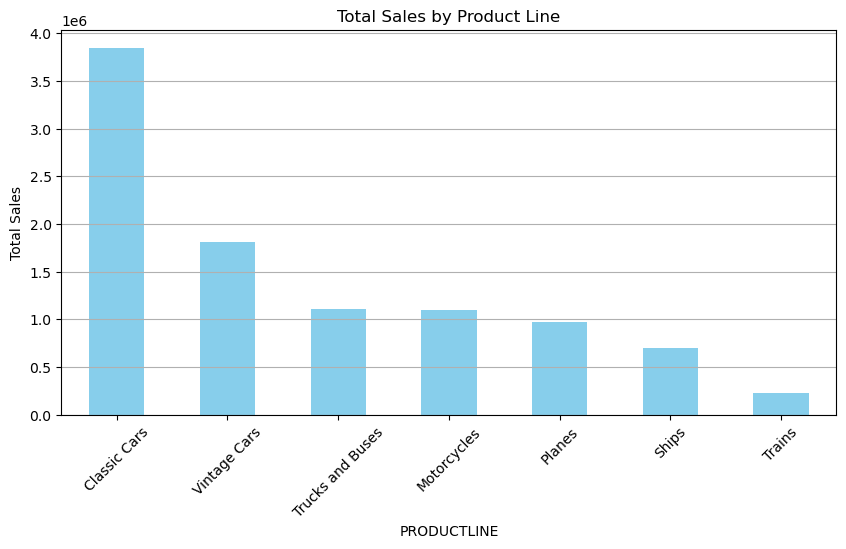

In [8]:
top_products.plot(kind="bar", figsize=(10,5), title="Total Sales by Product Line", color='skyblue')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [9]:
top_customers = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
print(top_customers.head(10))  # Top 10 customers


CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64


Text(0.5, 0, 'Customer Name')

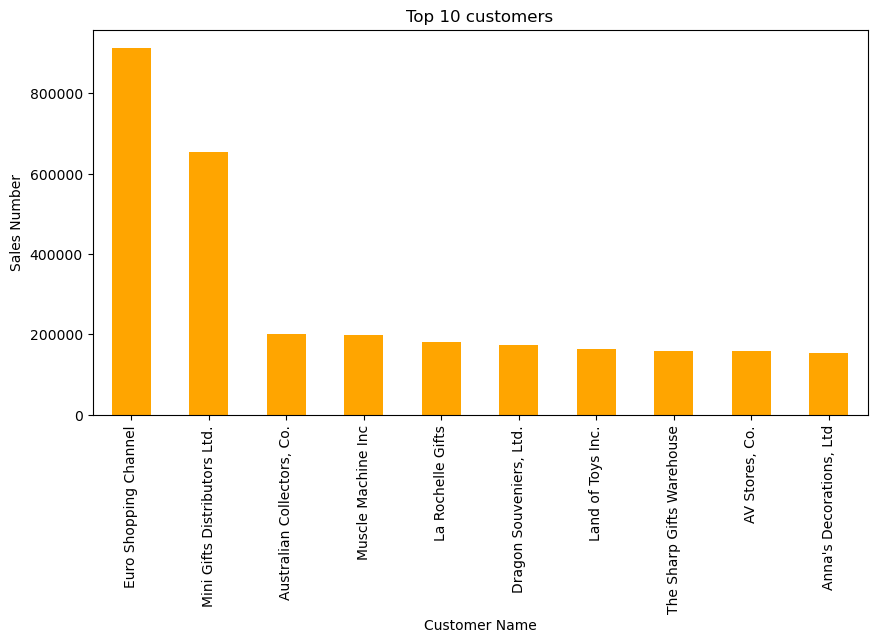

In [10]:
top_customers.head(10).plot(kind='bar', figsize=(10,5), color='orange', title='Top 10 customers')
plt.ylabel("Sales Number")
plt.xlabel("Customer Name")

In [11]:
country_sales=df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
print(country_sales.head(10))

COUNTRY
USA          3355575.69
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


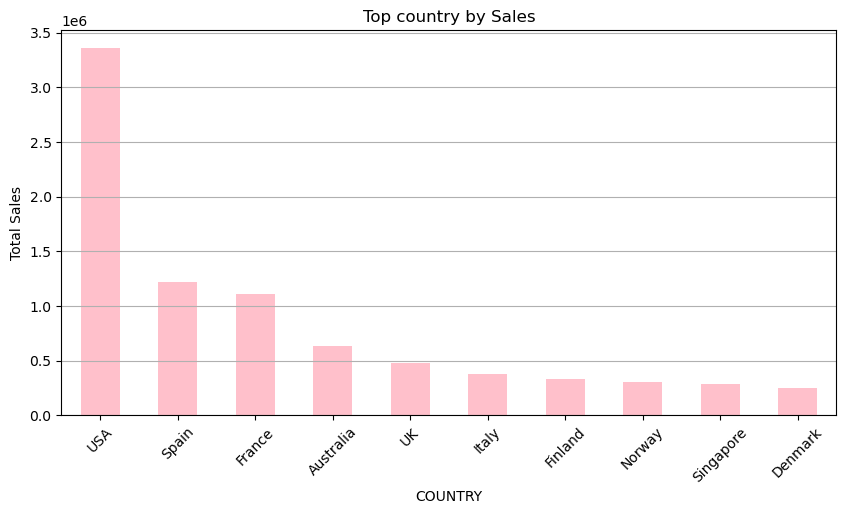

In [12]:
country_sales.head(10).plot(kind='bar', title='Top country by Sales', color='pink', figsize=(10,5))
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
deal_sales = df.groupby("DEALSIZE")["SALES"].sum().sort_values(ascending=False)
print(deal_sales)


DEALSIZE
Medium    5931231.47
Small     2570033.84
Large     1258956.40
Name: SALES, dtype: float64


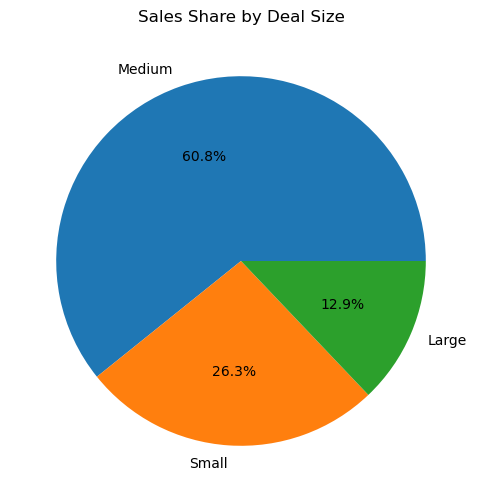

In [14]:
deal_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Sales Share by Deal Size")
plt.ylabel("")
plt.show()


YEAR         2003        2004       2005
MONTH                                   
1       129753.60   292688.10  339543.42
2       140836.19   311419.53  303982.56
3       155809.32   205733.73  374262.76
4       201609.55   206148.12  261633.29
5       192673.11   273438.39  457861.06
6       168082.56   286674.22        NaN
7       187731.88   327144.09        NaN
8       197809.30   461501.27        NaN
9       263973.36   320750.91        NaN
10      448452.95   552924.25        NaN
11     1029837.66  1058699.29        NaN
12      236444.58   372802.66        NaN


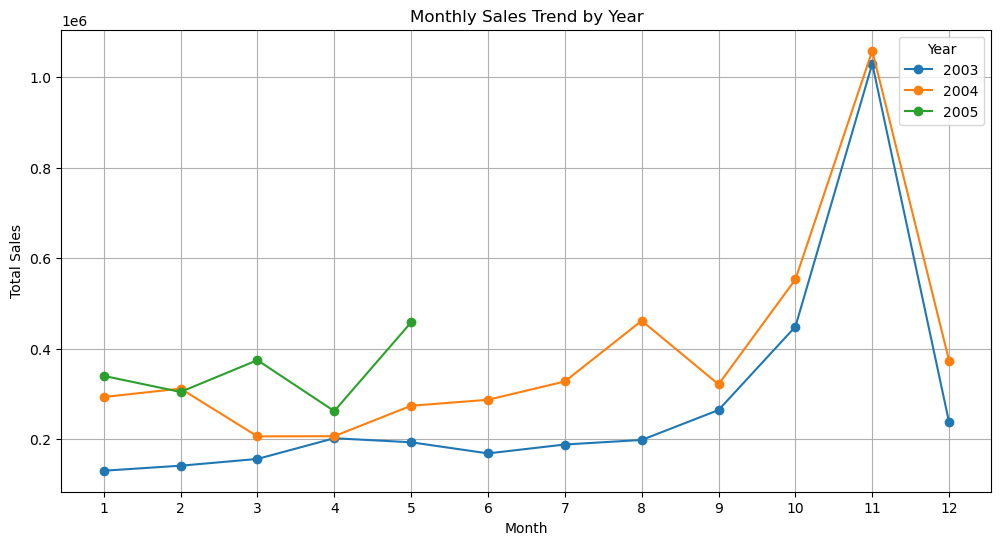

In [15]:
df['MONTH'] = df['ORDERDATE'].dt.month
df['YEAR'] = df['ORDERDATE'].dt.year

monthly_trend = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().unstack(0)
print(monthly_trend)

monthly_trend.plot(figsize=(12,6), title="Monthly Sales Trend by Year", marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.legend(title="Year")
plt.show()


In [16]:
top_products_by_sales = df.groupby("PRODUCTCODE")["SALES"].sum().sort_values(ascending=False)
print(top_products_by_sales.head(10))


PRODUCTCODE
S18_3232    284249.02
S10_1949    179815.23
S12_1108    168585.32
S10_4698    158202.48
S18_2238    154623.95
S12_3891    145332.04
S18_1662    139421.97
S24_3856    135859.20
S18_4027    133779.35
S12_1666    130466.79
Name: SALES, dtype: float64


In [17]:
top_products_by_quantity = df.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum().sort_values(ascending=False)
print(top_products_by_quantity.head(10))


PRODUCTCODE
S18_3232     1754
S18_4600     1031
S700_4002    1029
S12_4473     1024
S24_3856     1017
S24_3949     1008
S50_1341      999
S24_2300      996
S18_2319      993
S700_2610     990
Name: QUANTITYORDERED, dtype: int64


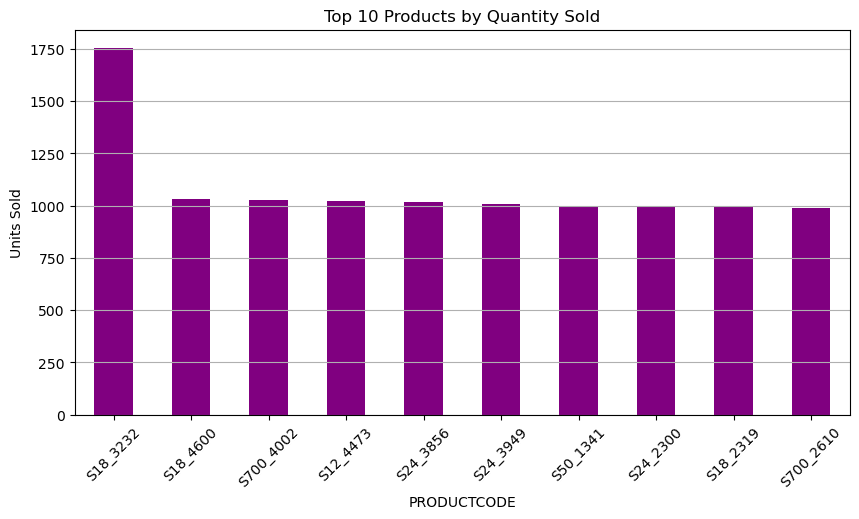

In [18]:
top_products_by_quantity.head(10).plot(kind="bar", figsize=(10,5), title="Top 10 Products by Quantity Sold", color="purple")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


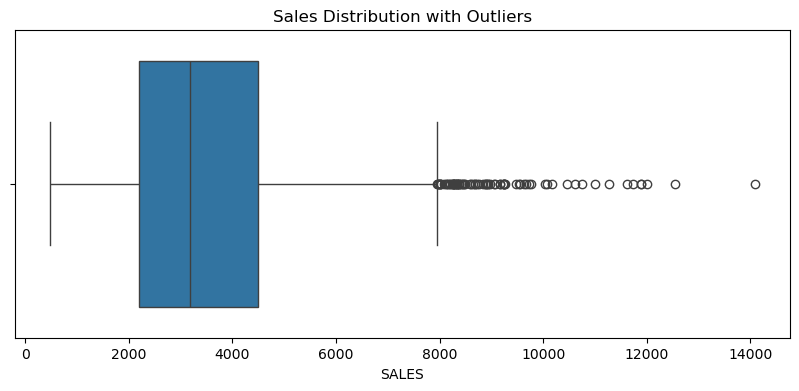

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df["SALES"])
plt.title("Sales Distribution with Outliers")
plt.show()


In [20]:
Q1 = df["SALES"].quantile(0.25)
Q3 = df["SALES"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["SALES"] < lower_bound) | (df["SALES"] > upper_bound)]
print(outliers[["ORDERNUMBER", "SALES", "CUSTOMERNAME", "PRODUCTCODE"]])


      ORDERNUMBER     SALES                    CUSTOMERNAME PRODUCTCODE
30          10150  10993.50         Dragon Souveniers, Ltd.    S10_1949
32          10174   8014.82     Australian Gift Network, Co    S10_1949
35          10206   9064.89  Canadian Gift Exchange Network    S10_1949
41          10280   8014.82              Amica Models & Co.    S10_1949
43          10304  10172.70              Auto Assoc. & Cie.    S10_1949
...           ...       ...                             ...         ...
2241        10325   8844.12              Baane Mini Imports    S32_2509
2295        10324   8209.44                 Vitachrome Inc.    S32_3522
2430        10395   8977.05                 Lyon Souveniers    S50_1514
2505        10388  10066.60                FunGiftIdeas.com   S700_1691
2634        10336   9558.80       La Corne D'abondance, Co.   S700_2824

[79 rows x 4 columns]


---

## ✅ Key Insights:
- The **product line with the highest total sales** was identified.
- The **country with the most orders** was determined.
- **Top 10 customers** by sales were listed.
- A **monthly sales trend** was plotted to understand time-based performance.

This project shows that I can work with data cleaning, aggregation, and visualization using Python. More improvements can be added based on business needs.

Thanks for reviewing!
